In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_confirmed = pd.read_csv(r'..\..\Datasets\Covid2\time_series_covid_19_confirmed.csv')
df_deaths = pd.read_csv(r'..\..\Datasets\Covid2\time_series_covid_19_deaths.csv')
df_recovered = pd.read_csv(r'..\..\Datasets\Covid2\time_series_covid_19_recovered.csv')

In [ ]:
def melt_df(df, value_name):
    df = df.drop(["Lat", "Long"], axis=1)
    df_melted = df.melt(id_vars=["Province/State", "Country/Region"], 
                        var_name="Date", value_name=value_name)
    df_melted["Date"] = pd.to_datetime(df_melted["Date"])
    return df_melted

df_c = melt_df(df_confirmed, "Confirmed")
df_d = melt_df(df_deaths, "Deaths")
df_r = melt_df(df_recovered, "Recovered")


df_all = df_c.merge(df_d, on=["Province/State", "Country/Region", "Date"], how="left")
df_all = df_all.merge(df_r, on=["Province/State", "Country/Region", "Date"], how="left")
df_all[["Deaths", "Recovered"]] = df_all[["Deaths", "Recovered"]].fillna(0)


C:\Users\soham\AppData\Local\Temp\ipykernel_44936\2367177429.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted["Date"] = pd.to_datetime(df_melted["Date"])
C:\Users\soham\AppData\Local\Temp\ipykernel_44936\2367177429.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted["Date"] = pd.to_datetime(df_melted["Date"])
C:\Users\soham\AppData\Local\Temp\ipykernel_44936\2367177429.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted["Date"] = pd.to_datetime(df_melted["Date"])


In [4]:
india_data = df_all[df_all["Country/Region"] == "India"]
india_data = india_data.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()
india_data.tail()


,Date,Confirmed,Deaths,Recovered
489,2021-05-25,27157795,311388,24350816.0
490,2021-05-26,27369093,315235,24633951.0
491,2021-05-27,27555457,318895,24893410.0
492,2021-05-28,27729247,322512,25178011.0
493,2021-05-29,27894800,325972,25454320.0


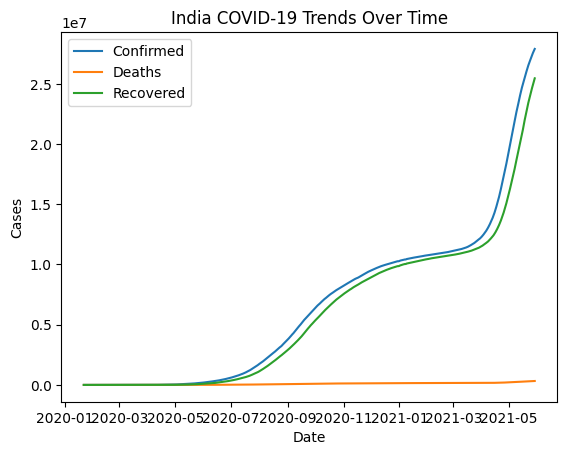

In [5]:
# 1: India's COVID-19 Trends Over Time
plt.figure()
sns.lineplot(data=india_data, x="Date", y="Confirmed", label="Confirmed")
sns.lineplot(data=india_data, x="Date", y="Deaths", label="Deaths")
sns.lineplot(data=india_data, x="Date", y="Recovered", label="Recovered")
plt.title("India COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()


C:\Users\soham\AppData\Local\Temp\ipykernel_44936\4279072729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_confirmed.values, y=top_confirmed.index, palette="mako")


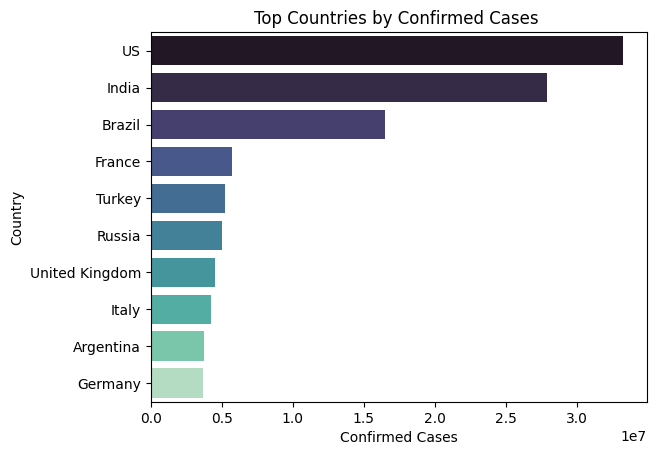

In [ ]:
# 2: Top Countries by Confirmed Cases
latest = df_all[df_all["Date"] == df_all["Date"].max()]
top_confirmed = latest.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10)

# Add India 
if "India" not in top_confirmed.index:
    india_total = latest[latest["Country/Region"] == "India"]["Confirmed"].sum()
    top_confirmed["India"] = india_total

top_confirmed = top_confirmed.sort_values(ascending=False)

# Plot
plt.figure()
sns.barplot(x=top_confirmed.values, y=top_confirmed.index, palette="mako")
plt.title("Top Countries by Confirmed Cases ")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.show()


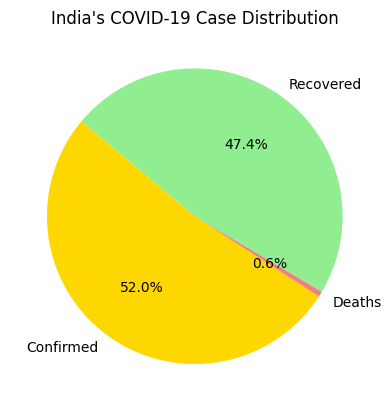

In [8]:
# 3: India's Current Case Distribution (Pie Chart)
latest_india = india_data[india_data["Date"] == india_data["Date"].max()]
pie_values = latest_india[["Confirmed", "Deaths", "Recovered"]].values.flatten()
pie_labels = ["Confirmed", "Deaths", "Recovered"]

plt.figure()
plt.pie(pie_values, labels=pie_labels, autopct="%1.1f%%", startangle=140, colors=["gold", "lightcoral", "lightgreen"])
plt.title("India's COVID-19 Case Distribution")
plt.show()


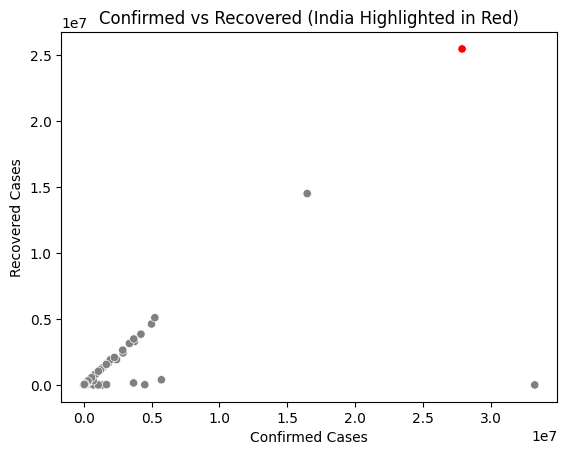

In [9]:
# 4: Confirmed vs Recovered (Global Scatter)
latest_global = df_all[df_all["Date"] == df_all["Date"].max()]
summary = latest_global.groupby("Country/Region")[["Confirmed", "Recovered"]].sum().reset_index()

plt.figure()
sns.scatterplot(data=summary, x="Confirmed", y="Recovered", hue=(summary["Country/Region"] == "India"),
                palette={True: "red", False: "grey"}, legend=False)
plt.title("Confirmed vs Recovered (India Highlighted in Red)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Recovered Cases")
plt.show()


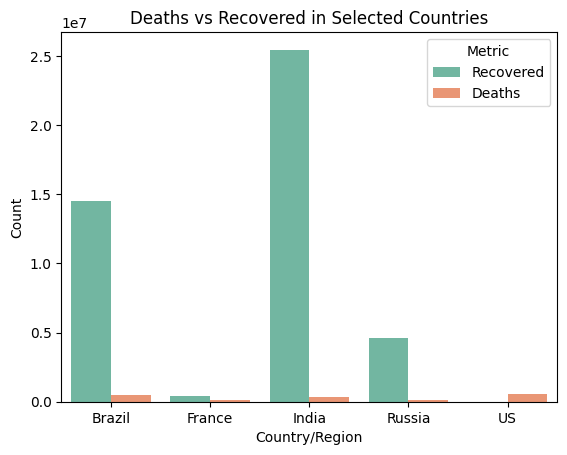

In [13]:
# 5: Deaths vs Recovered for Selected Countries
selected = ["India", "US", "Brazil", "Russia", "UK", "France"]
subset = latest_global[latest_global["Country/Region"].isin(selected)]
subset = subset.groupby("Country/Region")[["Recovered", "Deaths"]].sum().reset_index()

plt.figure()
sns.barplot(data=subset.melt(id_vars="Country/Region", var_name="Metric", value_name="Count"),
            x="Country/Region", y="Count", hue="Metric", palette="Set2")
plt.title("Deaths vs Recovered in Selected Countries")
plt.ylabel("Count")
plt.show()
